<a href="https://colab.research.google.com/github/kodestuff/Credit-Card-Fraud-Detection/blob/main/CC_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install seaborn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.metrics import classification_report , confusion_matrix

In [7]:
from imblearn.over_sampling import SMOTE

In [9]:
df = pd.read_csv('creditcard.csv')

/tmp/ipython-input-9-544752844.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('creditcard.csv')


In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [14]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33755,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33756,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33757,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33758,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [16]:
df['Class'].value_counts()


,count
Class,
0.0,33656
1.0,103


In [17]:
df['Class'].value_counts(normalize=True)

,proportion
Class,
0.0,0.996949
1.0,0.003051


Text(0.5, 1.0, 'Fraud vs Non-Fraud Transaction Counts')

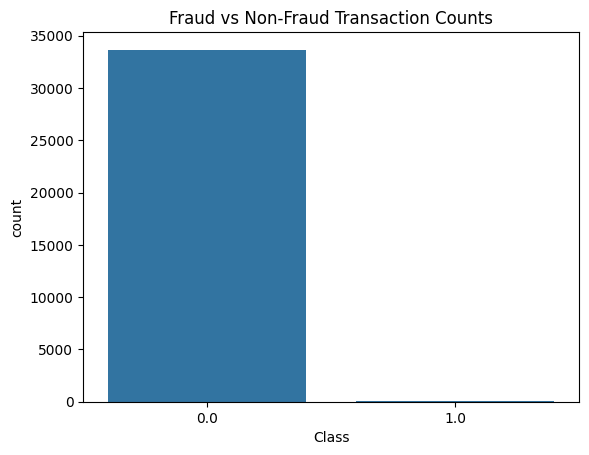

In [22]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Transaction Counts")

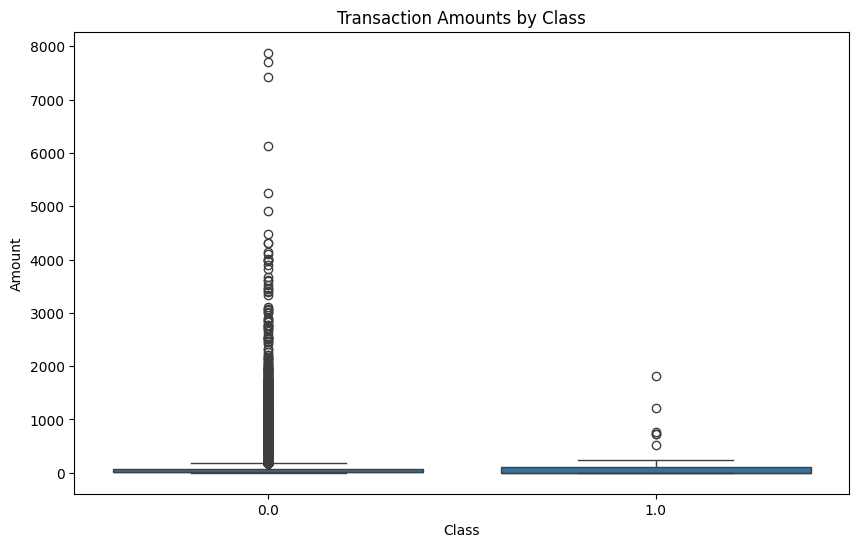

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amounts by Class")
plt.show()

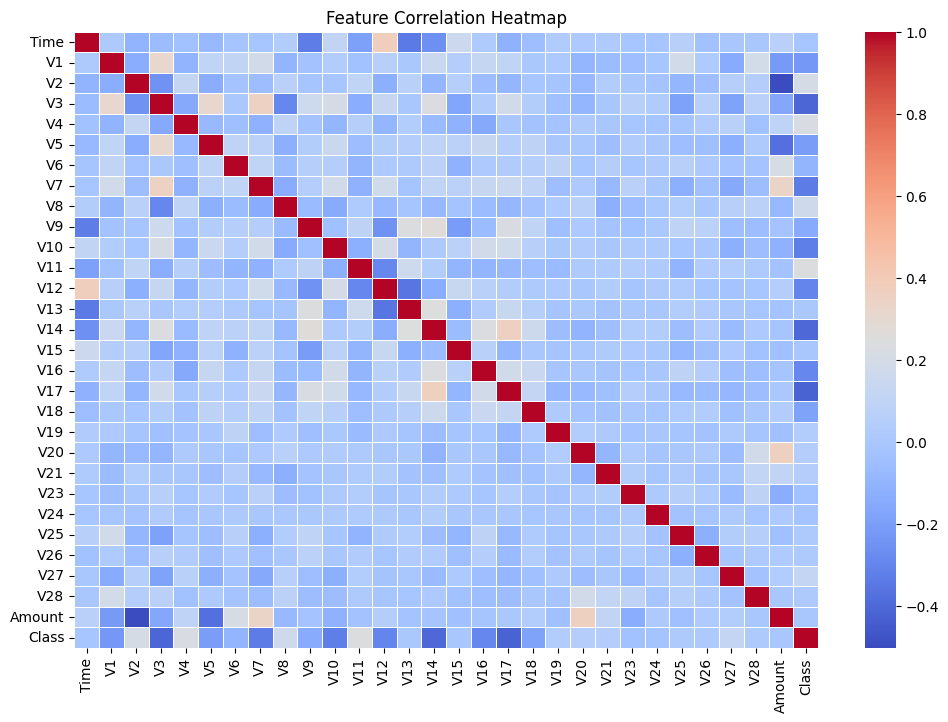

In [27]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include='number').corr()

sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
# this helps the team to find the relation between data points
# usually heatmap values are from +1 to -1

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scale = StandardScaler()

In [33]:
df['Amount_scaled']=scale.fit_transform(df[['Amount']])

In [34]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.292214
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.352595
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.297368
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.177586
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,-0.057246


In [40]:
#as we have already transformed amount we can drop it
#and time isnt required here , so
df.drop(['Time','Amount'], axis=1,inplace=True)

In [41]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.292214
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.352595
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.297368
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.177586
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-0.057246


In [44]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V23,V24,V25,V26,V27,V28,Class,Amount_scaled
count,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,...,33760.000000,33760.000000,33759.000000,33759.000000,33759.000000,33759.000000,33759.000000,33759.000000,33759.000000,3.375900e+04
mean,-0.210769,0.090212,0.718086,0.205183,-0.215343,0.092961,-0.118041,0.031774,0.285485,-0.095064,...,0.044957,-0.031917,-0.042490,0.008641,0.135181,0.021953,0.012227,0.003599,0.003051,1.683800e-18
std,1.849230,1.545474,1.565917,1.413512,1.397150,1.312452,1.270591,1.257190,1.243503,1.142746,...,0.671623,0.778003,0.544158,0.591997,0.435728,0.507048,0.388694,0.303696,0.055153,1.000015e+00
min,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,-14.166795,...,-13.694584,-20.262054,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,-3.644006e-01
25%,-0.957639,-0.480557,0.248743,-0.705571,-0.813268,-0.646448,-0.598428,-0.156904,-0.504769,-0.574075,...,-0.160852,-0.241145,-0.177751,-0.325370,-0.128167,-0.331954,-0.062816,-0.007200,0.000000,-3.340977e-01
50%,-0.240862,0.125560,0.834797,0.194608,-0.251247,-0.165186,-0.072077,0.041389,0.164850,-0.148489,...,-0.022156,-0.084376,-0.051504,0.062636,0.174733,-0.061390,0.009070,0.021002,0.000000,-2.722410e-01
75%,1.162820,0.767388,1.460421,1.089341,0.303673,0.479350,0.439445,0.303476,1.025500,0.350293,...,0.165501,0.091394,0.075396,0.398457,0.420014,0.301171,0.088390,0.076330,0.000000,-3.525923e-02
max,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,12.701539,...,17.281859,22.614889,13.876221,4.014444,5.525093,3.517346,11.135740,5.678671,1.000000,3.421484e+01


In [46]:
X = df.drop('Class',axis=1)
Y = df['Class']

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
# training the data by 20%

In [60]:
# next we are gonna handle imbalance data
from imblearn.over_sampling import SMOTE

In [61]:
print(Y_train.isnull().sum())


1


In [62]:
Y_train.fillna(0,inplace=True)

In [65]:
X_train.isnull().sum()
Y_train.isnull().sum()

np.int64(0)

In [66]:
# encountered "couldnt convert string to float"
# so we are performing type convertions
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(f"{col} - unique values: {X_train[col].unique()[:5]}")


V22 - unique values: [-0.668133662666061 -0.395639266366248 -1.12330977546923 0.641421327558063
 -0.783862808903064]


In [68]:
X_train.replace('-', np.nan, inplace=True)
X_train = X_train.dropna()
Y_train = Y_train[X_train.index]


/tmp/ipython-input-68-1453271023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.replace('-', np.nan, inplace=True)


In [70]:
X_train.isnull().sum()
Y_train.isnull().sum()

np.int64(0)

In [71]:
#solving imvbalance datas
smot = SMOTE(random_state=42)
X_train_sm,Y_train_sm = smot.fit_resample(X_train,Y_train)

In [72]:
#Lets train the models
from sklearn.ensemble import RandomForestClassifier
mod = RandomForestClassifier(random_state=42)
mod.fit(X_train_sm,Y_train_sm)

RandomForestClassifier(random_state=42)

In [73]:
Y_pred = mod.predict(X_test)

In [74]:
from sklearn.metrics import classification_report , confusion_matrix

In [75]:
print("Classification Report:",classification_report(Y_test,Y_pred))

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6733
         1.0       0.95      0.95      0.95        19

    accuracy                           1.00      6752
   macro avg       0.97      0.97      0.97      6752
weighted avg       1.00      1.00      1.00      6752



In [80]:
print("Confussion Matrix:",confusion_matrix(Y_test,Y_pred))

Confussion Matrix: [[6732    1]
 [   1   18]]


ROC AUC Score: 0.97


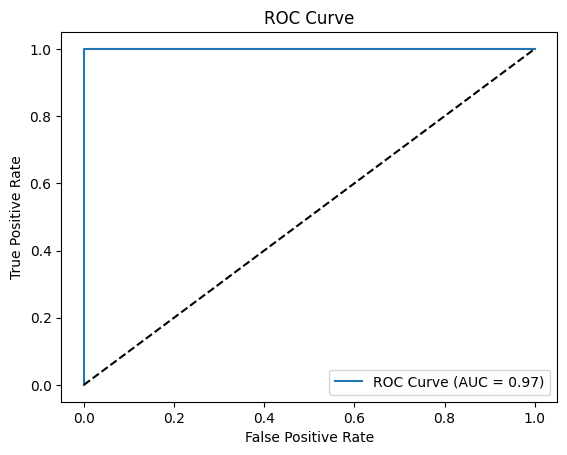

In [84]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC AUC score
roc_auc = roc_auc_score(Y_test, Y_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, mod.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
